# Selection of MC data

## This notebook:

- Uses Monte Carlo data.
- Selects events with 1 S1 and 1 S2.
- Writes a dst DataFrame

## Authors: JJGC

### Software: KrCalib : https://github.com/nextic/KrCalib/

### Description:

- Uses Kr83_NEW_v1_04_00_nexus_v5_03_04_ACTIVE_10.2bar_run4 MC production. January 2019. 


In [2]:
import time
print("Last updated on ", time.asctime())

Last updated on  Wed Mar 27 14:26:28 2019


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [4]:
import os
import time
import datetime 
import numpy as np
import pandas as pd
import tables            as tb
import random
import glob
import seaborn as sns
sns.set()

In [5]:
from  invisible_cities.io.dst_io              import load_dsts
from  invisible_cities.core .core_functions   import in_range
from  invisible_cities.core.system_of_units_c import units


In [6]:
from krcal.core.io_functions       import filenames_from_paths
from krcal.core.io_functions       import write_monitor_vars
from krcal.core.io_functions       import kdst_write
from krcal.core.histo_functions    import h1, h1d, h2d, plot_histo

In [7]:
from krcal.core.kr_types           import PlotLabels
from krcal.core.analysis_functions import kr_ranges_and_bins
from krcal.core.analysis_functions import kr_event
from krcal.core.analysis_functions import selection_info
from krcal.core.analysis_functions import selection_in_band
from krcal.core.analysis_functions import plot_selection_in_band
from krcal.core.s1s2_functions     import s1d_from_dst
from krcal.core.s1s2_functions     import s2d_from_dst
from krcal.core.s1s2_functions     import plot_s1histos
from krcal.core.s1s2_functions     import plot_s2histos

In [8]:
from krcal.core.plt_functions      import plot_xy_density
from krcal.core.plt_functions      import plot_s1_vs_z
from krcal.core.plt_functions      import plot_s2_vs_z
from krcal.core.plt_functions      import plot_s2_vs_s1
from krcal.core.plt_functions      import plot_q_vs_s2
from krcal.core.plt_functions      import plot_energy_distributions
from krcal.core.plt_functions      import plot_energy_vs_t


In [9]:
import krcal.dev.corrections       as corrections 
import krcal.utils.hst_extend_functions as hst

In [10]:
from krcal.core.core_functions          import time_delta_from_time
from krcal.core import fit_functions_ic as fitf
from krcal.core.histo_functions import profile1d

### Input/output 

In [11]:
path   = os.path.expandvars("/home/jmbenlloch/next/next100/Kr/kdst/")
files  = "Kr83*.h5"
filenames = "".join([path, files])
input_dst_filenames  = glob.glob(os.path.expandvars(filenames))
output_dst_filename = "".join(['/home/jmbenlloch/next/next100/Kr/dst/', 'Kr83_NEXT100_v1_04_00_nexus_v5_03_04_ACTIVE_10.2bar_run4.h5'])

write_filtered_dst = True

In [12]:
print(f'input dsts:\n first = {input_dst_filenames[0]}\n last = {input_dst_filenames[-1]}')
print(f'size of input dst = {len(input_dst_filenames)}')
print(f"output dst = {output_dst_filename}")                     

input dsts:
 first = /home/jmbenlloch/next/next100/Kr/kdst/Kr83_NEXT100_v1_05_02_kdst_v5_03_10_ACTIVE_15bar.12.h5
 last = /home/jmbenlloch/next/next100/Kr/kdst/Kr83_NEXT100_v1_05_02_kdst_v5_03_10_ACTIVE_15bar.999.h5
size of input dst = 1907
output dst = /home/jmbenlloch/next/next100/Kr/dst/Kr83_NEXT100_v1_04_00_nexus_v5_03_04_ACTIVE_10.2bar_run4.h5


In [13]:
dst_full           = load_dsts(input_dst_filenames, "DST", "Events")

In [14]:
unique_events = ~dst_full.event.duplicated()

number_of_S2s_full  = np.size         (unique_events)
number_of_evts_full = np.count_nonzero(unique_events)

print(f"Total number of S2s   : {number_of_S2s_full} ")
print(f"Total number of events: {number_of_evts_full}")

Total number of S2s   : 1549091 
Total number of events: 1548970


In [15]:
dst_full.columns

Index(['event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w', 'S1h',
       'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT', 'Z',
       'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

In [16]:
ntot = len(dst_full)
print(f"length of dst = {ntot}")

length of dst = 1549091


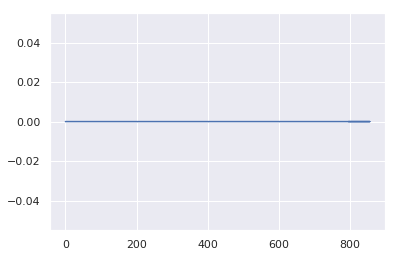

In [17]:
plt.plot(dst_full.time)

# test

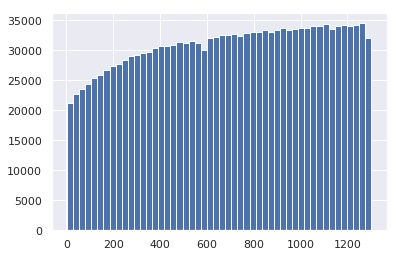

In [18]:
_ = plt.hist(dst_full.Z, bins=50)

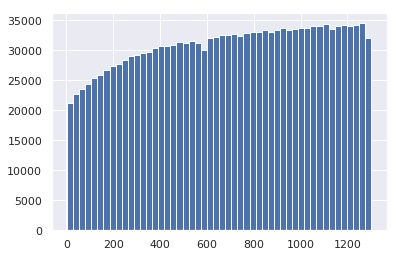

In [19]:
_ = plt.hist(dst_full.DT, bins=50)

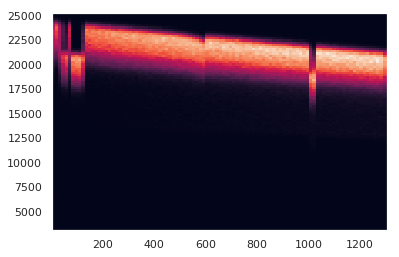

In [20]:
_ = plt.hist2d(dst_full.Z, dst_full.S2e, bins=[100,100])

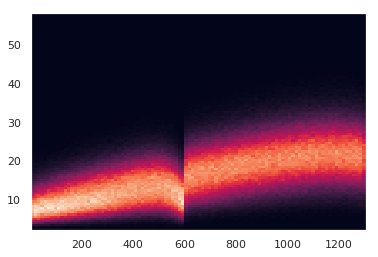

In [21]:
_ = plt.hist2d(dst_full.Z, dst_full.S1e, bins=[100,100])

# end test

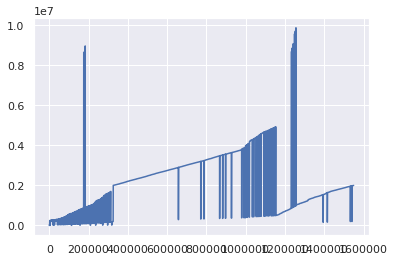

In [22]:
plt.plot(np.arange(len(dst_full)), dst_full.event)

In [23]:
dst_full.head()

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
0,24000.0,0.0,0.0,0.0,1.0,1.0,200.0,3.670926,15.639486,100100.0,...,10.0,336.394684,336.394684,1.586118,-281.746450,-284.478702,400.386306,-2.351369,57.429051,49.857322
1,24001.0,0.0,0.0,0.0,1.0,1.0,250.0,3.429985,14.602062,100100.0,...,1.0,379.393494,379.393494,1.654260,325.000000,-75.000000,333.541602,-0.226799,0.000000,0.000000
2,24002.0,0.0,0.0,0.0,1.0,1.0,175.0,6.530146,23.171871,100100.0,...,15.0,655.392639,655.392639,2.220199,-52.219861,344.044956,347.985410,1.721429,9.790273,8.460335
3,24004.0,0.0,0.0,0.0,1.0,1.0,125.0,4.079885,12.681910,100100.0,...,7.0,81.354004,81.354004,0.915290,138.268745,-114.359730,179.433536,-0.691038,5.124176,5.119745
4,24005.0,0.0,0.0,0.0,1.0,1.0,200.0,6.141267,29.309740,100100.0,...,16.0,1256.373047,1256.373047,2.924475,102.169648,-208.317945,232.023713,-1.114817,27.390523,79.089314


In [24]:
dst_full.S2q

0      285.797058
1        5.681159
2      259.188385
3      275.246338
4      200.927536
5        6.492753
6      201.913055
7      122.144936
8      207.304352
9      219.652176
10     190.318832
11     176.869583
12     217.101440
13     252.579712
14     150.028976
15     179.246368
16     251.884064
17     213.970993
18     256.231873
19     222.898560
20     223.536224
21     168.927551
22     182.086960
23     142.492752
24     208.405792
25     183.130432
26     237.507248
27     281.159424
28     269.623169
29       5.681159
          ...    
767    281.101440
768    192.869568
769    224.173904
770    298.550720
771     69.913040
772     10.202899
773    217.855072
774    254.376816
775    231.942017
776    194.376816
777    280.579712
778    244.115936
779    189.333328
780    229.101440
781    251.884064
782    168.347824
783    216.811600
784    302.318848
785    198.956512
786    174.840576
787    192.753616
788    169.913040
789    161.681152
790    327.710144
791    230

In [73]:
RMAX      = 450
RFID      = 430
RCORE     = 400
s1e_range = (1, 50)
s2e_range = (15000, 25000)
s2w_range =(4, 15)
s2q_range = (0, 800)
Nsipm_min = 10
xy_range  = (-RMAX,  RMAX)
z_range   = (10,  1400)
e_range = (5000, 25000)
lt_range = (1000, 12000)
c2_range = (0,5)

krTimes, krRanges, krNbins, krBins = kr_ranges_and_bins(dst_full,
                                                        xxrange   = xy_range,
                                                        yrange    = xy_range,
                                                        zrange    = z_range,
                                                        s2erange  = s2e_range,
                                                        s1erange  = s1e_range,
                                                        s2qrange  = s2q_range,
                                                        xnbins    = 100,
                                                        ynbins    = 100,
                                                        znbins    = 50,
                                                        s2enbins  = 50,
                                                        s1enbins  = 50,
                                                        s2qnbins  = 50,
                                                        tpsamples = 3600) # tsamples in seconds

### Time
- Extension in hours of data sample considered

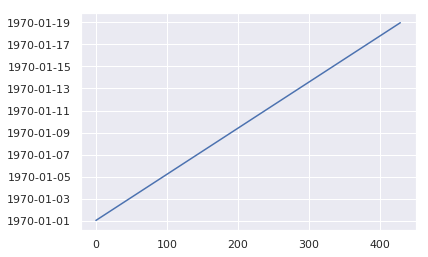

In [74]:
plt.plot(krTimes.timeStamps)

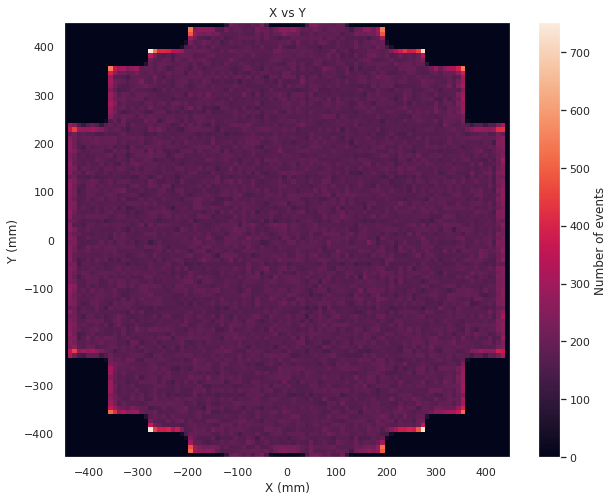

In [75]:
nevt = h2d(dst_full.X, dst_full.Y, krNbins.X, krNbins.Y, krRanges.X, krRanges.Y, 
           pltLabels=PlotLabels(x='X (mm)', y='Y (mm)', title='X vs Y'),
           profile=False,
           figsize=(10,8))

### S1/S2

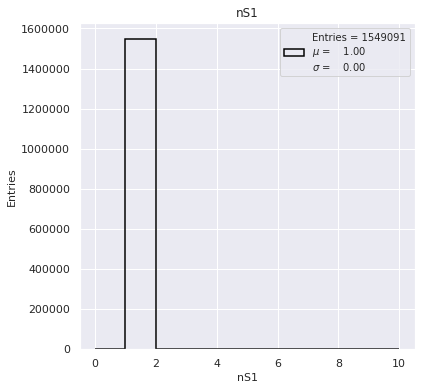

In [76]:
n, b, _, _ = h1d(dst_full.nS1.values, bins = 10, range = (0,10),
           pltLabels=PlotLabels(x='nS1', y='Entries', title='nS1'))

In [77]:
fnS1 = n[n.argmax()]/np.sum(n)
print(f'fraction of S1s = {fnS1}')

fraction of S1s = 1.0


#### Fraction of events with 1 S1 is 0.5. For Krypton select events with 1 S1

### Select events with 1 S1

In [78]:
dst1s1 = dst_full[dst_full.nS1==1]

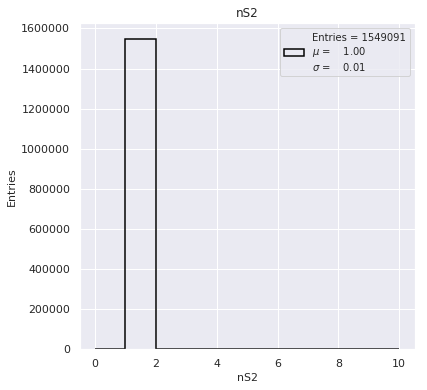

In [79]:
n, b, _, _ = h1d(dst1s1.nS2.values, bins = 10, range = (0,10),
           pltLabels=PlotLabels(x='nS2', y='Entries', title='nS2'))

#### For Krypton select events with only 1 S2

In [80]:
fnS2 = n[n.argmax()]/np.sum(n)
print(f'fraction of S2s = {fnS2}')

fraction of S2s = 0.9998437793518908


### Select events with 1 S2

In [81]:
dst    = dst1s1[dst1s1.nS2==1]

In [82]:
n_full   = len(dst)
eff = n_full   / ntot 
print(f"Total number of events with 1 s1 and 1 s2 : {n_full}: selection eff = {eff} ")

Total number of events with 1 s1 and 1 s2 : 1548849: selection eff = 0.9998437793518908 


### S1 and S2 distributions

In [83]:
s1d = s1d_from_dst(dst)

warning, empty slice of x = [100100. 100100. 100100. ... 100100. 100100. 100100.] in range = (0, 600)
returning mean and std of x = [100100. 100100. 100100. ... 100100. 100100. 100100.]


In [84]:
s2d = s2d_from_dst(dst)

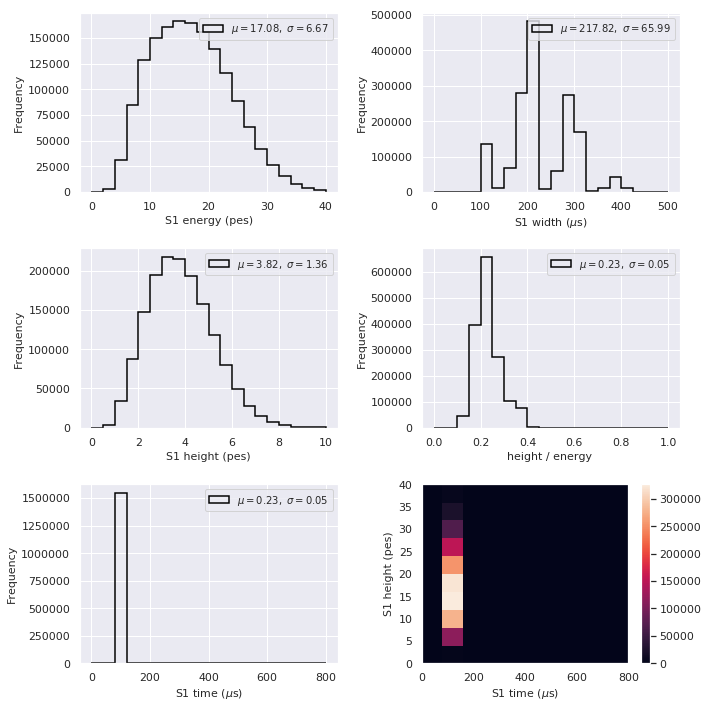

In [85]:
plot_s1histos(dst,  s1d, bins=20, figsize=(10,10))

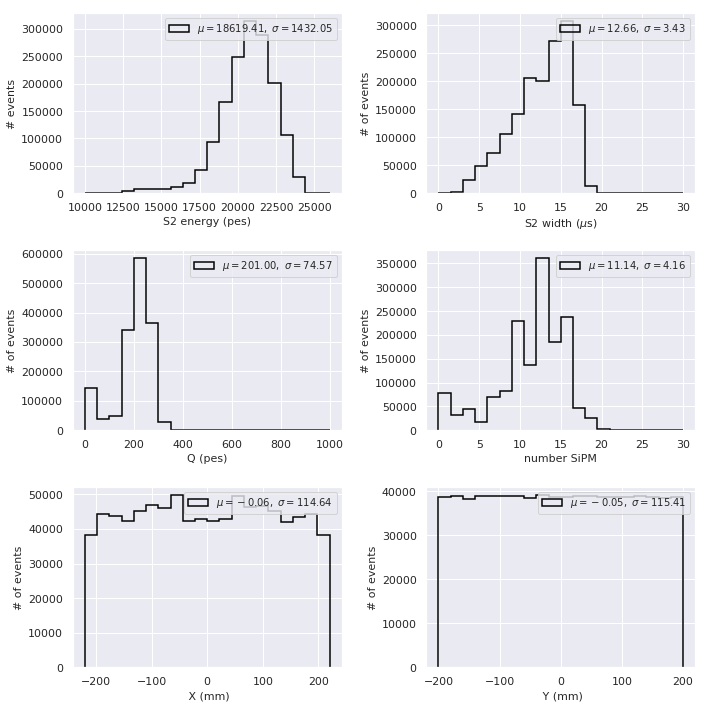

In [86]:
plot_s2histos(dst,  s2d, bins=20, figsize=(10,10), emin=10000, emax=26000)

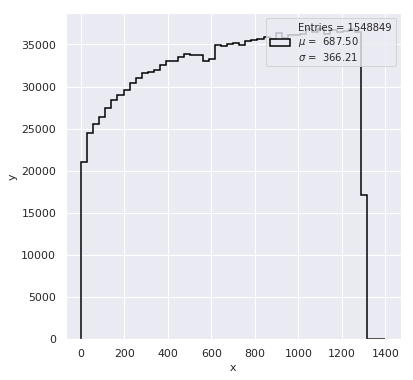

In [87]:
(_) = h1d(dst.Z, bins = 50, range =(0,1400))

#### MC production, S1 and S2 in fixed positions.

## Fiducial selection 

In [88]:
dst_s1e    = dst[in_range(dst.S1e, *s1e_range)] 
dst_s2e    = dst_s1e[in_range(dst_s1e.S2e, *s2e_range)] 
dst_s2w    = dst_s2e[in_range(dst_s2e.S2w, *s2w_range)]
dst_sipm   = dst_s2w[dst_s2w.Nsipm > Nsipm_min] 
dst_s2q    = dst_sipm[in_range(dst_sipm.S2q, *s2q_range)]
dst       = dst_s2q

warning, empty slice of x = [100100. 100100. 100100. ... 100075. 100100. 100100.] in range = (0, 600)
returning mean and std of x = [100100. 100100. 100100. ... 100075. 100100. 100100.]


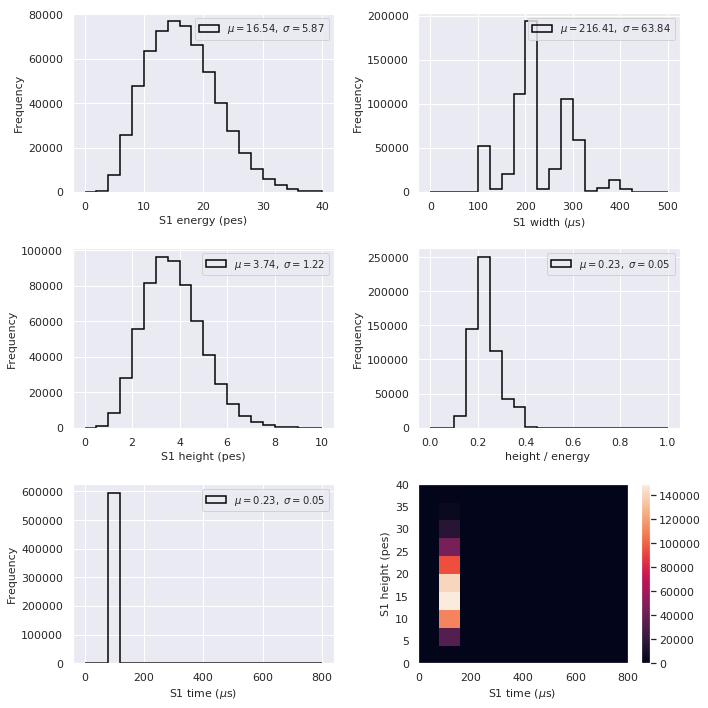

In [89]:
s1d = s1d_from_dst(dst)
plot_s1histos(dst,  s1d, bins=20, figsize=(10,10))

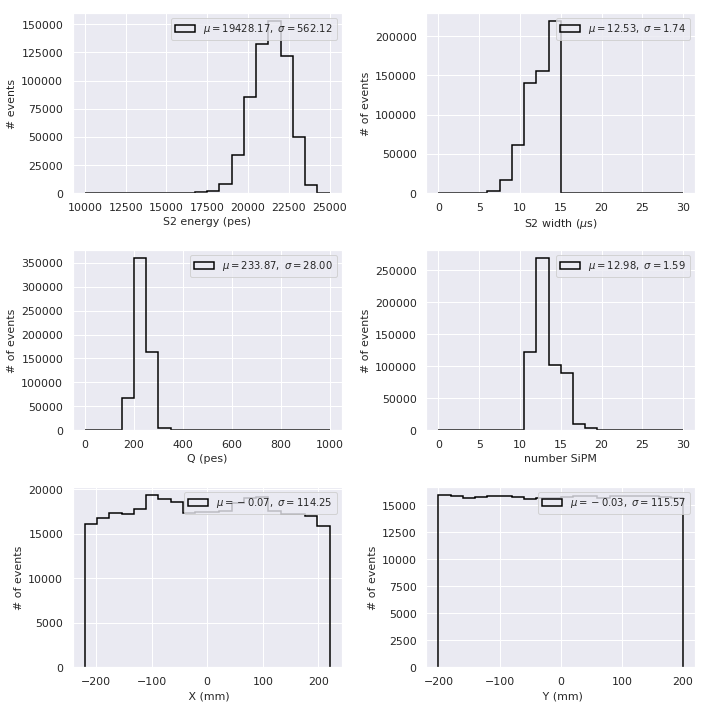

In [90]:
s2d = s2d_from_dst(dst)
plot_s2histos(dst, s2d, bins=20, emin=10000, emax=25000, figsize=(10,10))

### Select fiducial region in R

In [91]:
dstf     = dst[dst.R < RFID]

In [92]:
dstf = dstf[dstf.Z > 1100]

In [93]:
dstf.Z.max()

1268.394775390625

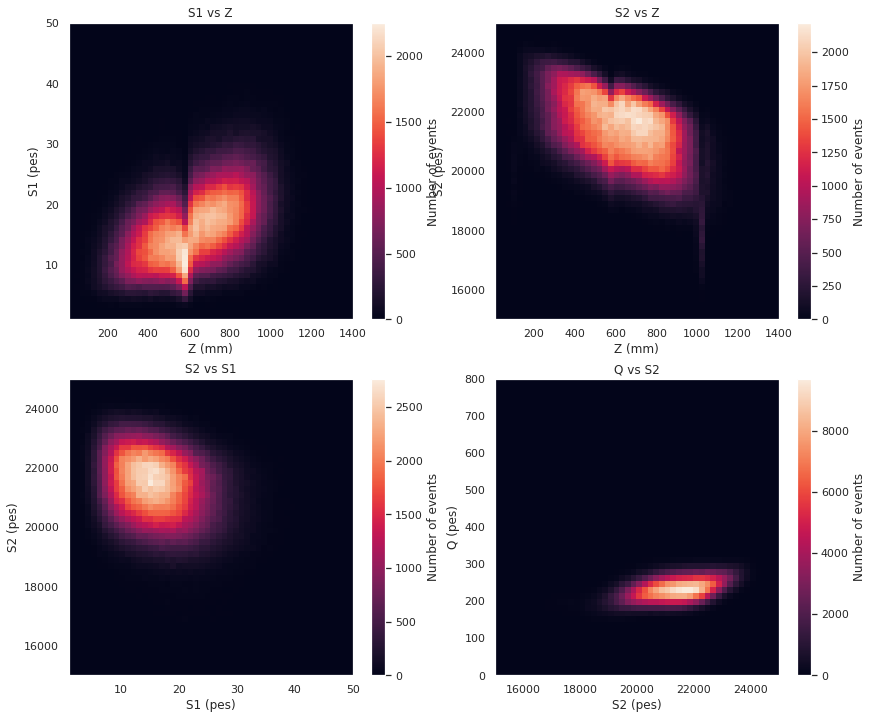

In [95]:
plot_energy_distributions(dst, krBins.Z, krBins.S1e, krBins.S2e, krBins.S2q, figsize=(14,12))

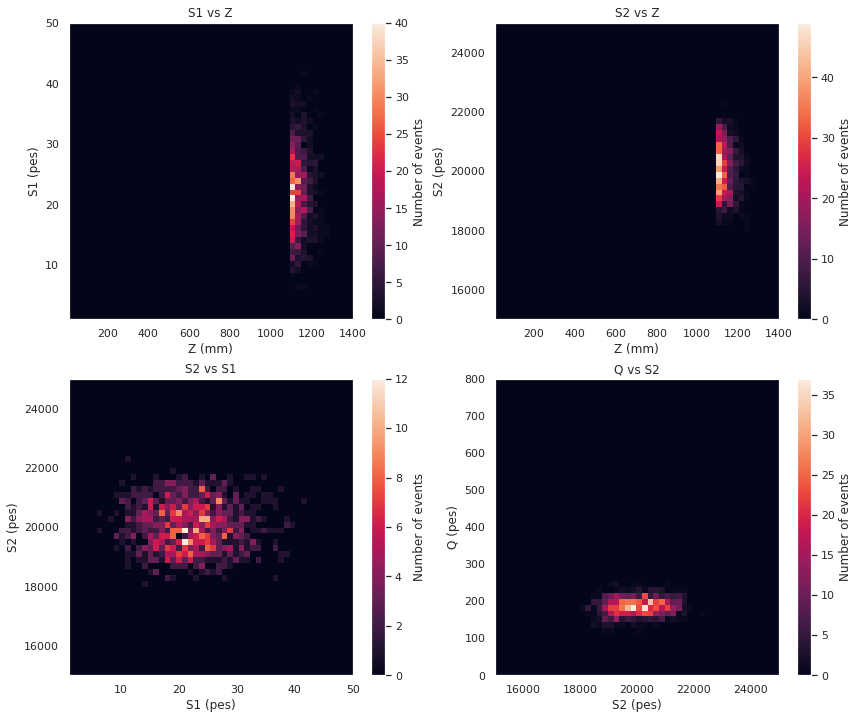

In [94]:
plot_energy_distributions(dstf, krBins.Z, krBins.S1e, krBins.S2e, krBins.S2q, figsize=(14,12))

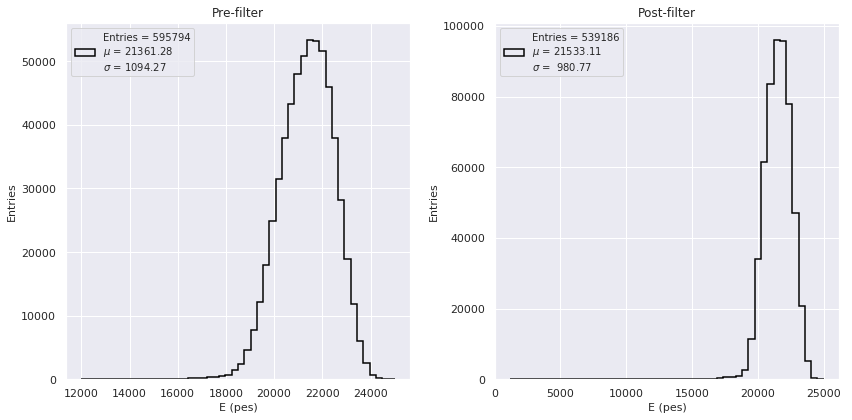

In [46]:
fig = plt.figure(figsize=(12,6))
ax      = fig.add_subplot(1, 2, 1)
(_)     = h1(dst.S2e,  bins = 50, range =(12000,25000))
plot_histo(PlotLabels('E (pes)','Entries','Pre-filter'), ax, legendloc='upper left')
ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(dstf.S2e,  bins = 50, range =(1200,25000))
plot_histo(PlotLabels('E (pes)','Entries','Post-filter'), ax, legendloc='upper left')
plt.tight_layout()

### X vs Y 

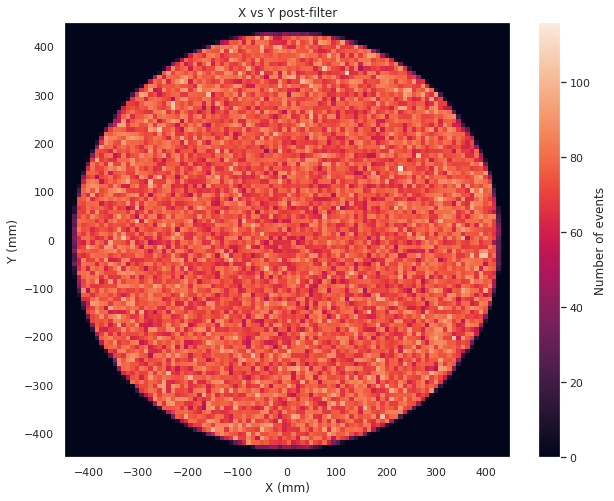

In [47]:
nevt = h2d(dstf.X, dstf.Y, krNbins.X, krNbins.Y, krRanges.X, krRanges.Y, 
           pltLabels=PlotLabels(x='X (mm)', y='Y (mm)', title='X vs Y post-filter'),
           profile=False,
           figsize=(10,8))

In [42]:
if (write_filtered_dst):
    print('writing filtered dst ', output_dst_filename)
    kdst_write(dst, output_dst_filename)

writing filtered dst  /home/jmbenlloch/next/next100/Kr/dst/Kr83_NEXT100_v1_04_00_nexus_v5_03_04_ACTIVE_10.2bar_run4.h5
